# Chapter 5
#### Nicetak

In [1]:
import datetime; datetime.datetime.now().strftime('%B %-d, %Y')

'January 15, 2022'

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## 5.1
>図5.7のグラフにおいて, $s$から$t$への最短路を求めよ.

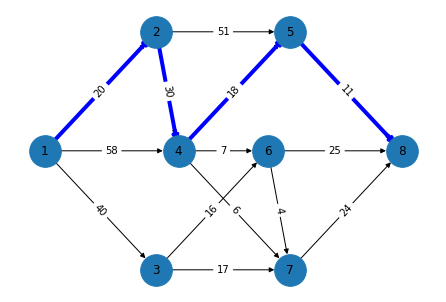

In [95]:
G = nx.DiGraph()
G.add_nodes_from(range(1, 9))
srcs = [1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7]
dists = [2, 3, 4, 4, 5, 6, 7, 5, 6, 7, 8, 7, 8, 8]
weights = [20, 40, 58, 30, 51, 16, 17, 18, 7, 6, 11, 4, 25, 24]
G.add_weighted_edges_from([(s, d, w) for s, d, w in zip(srcs, dists, weights)])

pos = {1: [-4, 0], 2: [-1.5, 2.5], 3: [-1.5, -2.5], 4: [-1, 0], \
    5: [1.5, 2.5], 6:[1, 0], 7:[1.5, -2.5], 8: [4, 0]}
edge_labels = nx.get_edge_attributes(G, "weight")

path = nx.dijkstra_path(G, 1, 8)

nx.draw(G, pos, node_size = 1000, with_labels = True)
nx.draw_networkx_edges(G, pos, \
    edgelist = [(path[i], path[i + 1]) for i in range(len(path) - 1)], \
    width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels);


## 5.2
>最小木問題の解法として, クラスカルのアルゴリズムの正当性を示せ. また, プリムのアルゴリズムの正当性を示せ.


## 5.3
>連結な重み付き無向グラフ$G = (V, E, c)$の全域木のうち, 重みが$k$番目に小さいものを第$k$最小全域木とよぶ. 定義より, 第1最小全域木は最小木である. 第2最小全域木を求めるアルゴリズムを考えよ.


第2最小全域木は, 少なくとも１つの辺は最小全域木と異なる辺を用いる. したがって,
- 最小全域木の辺のうち一本を取り除いたグラフにおいて最小全域木を構成
- そのうち, 重みの合計が最も小さいものが第２最小全域木となる

以下では, 図5.10の第２最小全域木を求める. (余談だが, 教科書の図5.10は最小全域木ではない.)

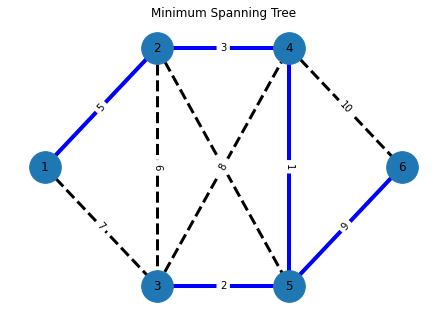

In [99]:
G = nx.Graph()
G.add_nodes_from(range(1, 7))

srcs = [1, 1, 2, 2, 2, 3, 3, 4, 4, 5]
dists = [2, 3, 3, 4, 5, 4, 5, 5, 6, 6]
weights = [5, 7, 6, 3, 4, 8, 2, 1, 10, 9]

G.add_weighted_edges_from([(s, d, w) for s, d, w in zip(srcs, dists, weights)])
edge_labels = nx.get_edge_attributes(G, "weight")

# Minimum Spanning Tree
mst = nx.minimum_spanning_tree(G)

# Plot
pos = {1:[-2.7, 0], 2:[-1, 1], 3:[-1, -1], 4:[1, 1], 5:[1, -1], 6:[2.7, 0]}
nx.draw(G, pos, node_size = 1000, with_labels = True, width=3, style = "dashed")
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for (u, v, d) in mst.edges(data=True)], width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title("Minimum Spanning Tree");

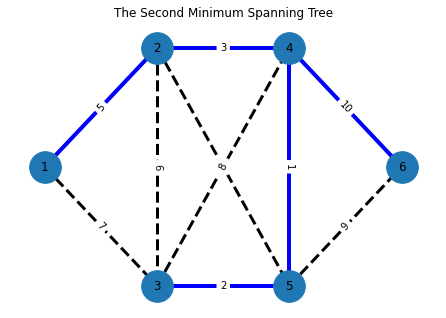

In [122]:
edges_mst = mst.edges(data=True)
sum_weight = 10**9
mst2 = mst.copy()

for (u, v, d) in edges_mst:
    G_tmp = G.copy()
    G_tmp.remove_edge(u, v)
    mst_tmp = nx.minimum_spanning_tree(G_tmp)
    sum_mst = sum([d['weight'] for (u, v, d) in edges_mst])
    if sum_weight > sum_mst:
        mst2 = mst_tmp.copy()

mst2

# Plot
nx.draw(G, pos, node_size = 1000, with_labels = True, width=3, style = "dashed")
nx.draw_networkx_edges(G, pos, edgelist = [(u, v) for (u, v, d) in mst2.edges(data=True)], width=4, edge_color="b")
nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = edge_labels)
plt.title("The Second Minimum Spanning Tree");    


## 5.4
>データ点 $s_1, \dots, s_5$ があり, 各店間の距離が図5.23のように与えられている. この時, 単リンク法によるクラスタリングを行い, デンドログラムを描け.


## 5.5
>最小費用流問題を利用することで輸送問題 (1.1節の例1.２)を解く方法を考えよ.


## 5.6
>２部グラフのマッチングのうちで辺の数が最大のものを求める問題を, **最大マッチング問題**とよぶ. 最大流問題を利用することで最大マッチング問題を解く方法を考えよ.
